# PS 3
## Question 1: Unsupervised Linear Models

**Your Name:** [Sara Honarvar]

**People I discussed this question with:** [None]

## Toy Dataset
For this problem, you will use the data file hb.csv. The input is 2,280 data points, each of which is 7
dimensional (i.e., input csv is 2280 rows by 7 columns). Use Principal Component Analysis
(either an existing library, or through your own implementation by taking the SVD of the
Covariance Matrix) for the follow tasks.

In [247]:
%matplotlib inline
import pandas
data = pandas.read_csv('hb.csv',header=None)
data.head()

,0,1,2,3,4,5,6
0,-7.140017,-6.556057,-2.046734,0.013247,4.874084,-3.163759,-6.855168
1,-9.426917,-22.520059,19.141155,5.425329,-3.300380,7.728743,-17.906016
2,-15.257052,-31.008478,22.409389,6.659027,-1.522000,7.837675,-25.505991
3,14.255144,1.431331,22.453813,4.520838,-17.917544,16.327738,6.240389
4,-12.617628,-13.478353,-0.634942,0.761668,7.284270,-3.965561,-13.323129


### Task 1
Assuming that the 7-dimensional space is excessive, you would like to reduce the dimension of the space. However, what dimensionality of space should we reduce it to? To determine this we need to compute its intrinsic dimensionality. Plot the relative value of the information content of each of the principal components and compare them.

Note: this information content is called the “explained variance” of each component, but you can also get this from the magnitude of the singular values. This plot is sometimes called a “Scree Plot”. 

In [248]:
X = data.iloc[:,0:7]  # all rows, all the features and no labels


In [249]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[-0.68733098, -0.3430022 , -0.09364972, ...,  0.4582598 ,
        -0.26614526, -0.45207203],
       [-0.90747856, -1.17821274,  0.87581676, ..., -0.31030064,
         0.65016596, -1.18083306],
       [-1.4687142 , -1.62231294,  1.02535706, ..., -0.14309794,
         0.65932966, -1.68202224],
       ...,
       [ 0.80886416,  1.14388507, -0.90976233, ...,  0.39483219,
        -0.7089032 ,  1.12795543],
       [-0.22660216, -1.0525732 ,  1.26365369, ..., -1.03448818,
         1.20949674, -0.90540781],
       [-1.2133314 , -1.61302562,  1.22296322, ..., -0.46247405,
         0.92136888, -1.60917815]])

In [250]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[-1.14321804e-01, -1.03488420e+00, -5.88596614e-12, ...,
        -1.14040602e-12,  1.76287849e-12,  2.16426522e-12],
       [-2.25197712e+00, -8.78654005e-01,  5.03652447e-12, ...,
        -2.98834289e-12,  1.45807595e-12,  5.27874139e-13],
       [-2.82043598e+00, -1.61339858e+00, -3.61830850e-12, ...,
         3.69120773e-12, -8.00167124e-13,  9.86435437e-13],
       ...,
       [ 2.27868877e+00,  7.20166934e-01, -2.90645499e-12, ...,
         1.11684193e-12, -2.38254023e-12,  5.09984608e-13],
       [-2.75900918e+00,  2.90492373e-01,  4.14250147e-12, ...,
         4.52547967e-12,  5.58686545e-13,  3.03376450e-13],
       [-3.12021304e+00, -1.14943522e+00,  5.72309942e-12, ...,
        -3.20030102e-12, -1.39828033e-13, -3.49715318e-12]])

In [251]:
pca.get_covariance()

array([[ 1.00043879,  0.69505545, -0.13348469, -0.26590455, -0.41992889,
         0.11702449,  0.81564581],
       [ 0.69505545,  1.00043879, -0.80587108, -0.87842197,  0.36136292,
        -0.63332372,  0.98333931],
       [-0.13348469, -0.80587108,  1.00043879,  0.99130973, -0.84389197,
         0.96907297, -0.68295838],
       [-0.26590455, -0.87842197,  0.99130973,  1.00043879, -0.7637676 ,
         0.92672992, -0.77526158],
       [-0.41992889,  0.36136292, -0.84389197, -0.7637676 ,  1.00043879,
        -0.95092725,  0.18344287],
       [ 0.11702449, -0.63332372,  0.96907297,  0.92672992, -0.95092725,
         1.00043879, -0.47992407],
       [ 0.81564581,  0.98333931, -0.68295838, -0.77526158,  0.18344287,
        -0.47992407,  1.00043879]])

In [252]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([6.96868692e-01, 3.03131308e-01, 3.14509711e-24, 9.87653331e-25,
       8.21245008e-25, 4.56086435e-25, 3.38222379e-25])

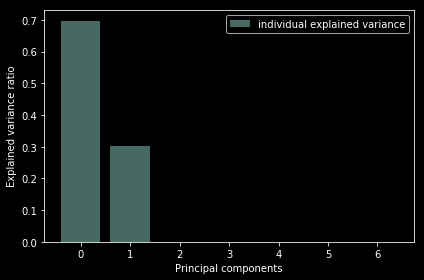

In [80]:
import matplotlib.pyplot as plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(7), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [253]:
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)
X_new

array([[-0.1143218 , -1.0348842 ],
       [-2.25197712, -0.878654  ],
       [-2.82043598, -1.61339858],
       ...,
       [ 2.27868877,  0.72016693],
       [-2.75900918,  0.29049237],
       [-3.12021304, -1.14943522]])

In [254]:
# Code Here
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(scaled_data)
pc = pca.transform(scaled_data)
print (pca.explained_variance_ratio_) 

[6.96868692e-01 3.03131308e-01 3.14509711e-24 9.87653331e-25
 8.21245008e-25 4.56086435e-25 3.38222379e-25]


In [255]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.114322,-1.034884,-5.880991e-12,-1.995067e-12,-1.144597e-12,1.767116e-12,2.156041e-12
1,-2.251977,-0.878654,5.024002e-12,1.342839e-12,-2.981765e-12,1.464719e-12,5.228783e-13
2,-2.820436,-1.613399,-3.618319e-12,2.560154e-12,3.691193e-12,-7.997383e-13,9.864663e-13
3,-1.538454,2.476250,-2.297959e-13,6.734487e-13,-1.183539e-12,-7.221897e-13,-3.047298e-12
4,-0.488852,-1.762238,5.026738e-12,1.301840e-12,2.001669e-12,-1.188923e-12,-7.819011e-13


In [257]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7']})
df.head()

,PC,var
0,PC1,6.968687e-01
1,PC2,3.031313e-01
2,PC3,3.145097e-24
3,PC4,9.876533e-25
4,PC5,8.212450e-25


[Text(0, 0.5, 'Explained variance'), Text(0.5, 0, 'Principal components')]

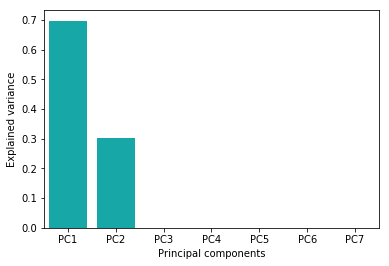

In [37]:
ax = sns.barplot(x='PC',y="var", 
           data=df, color="c");
ax.set(xlabel='Principal components', ylabel='Explained variance')

**Question:** Approximately how many components dominate the space?, and what does this tell us about the intrinsic dimensionality of the space?

**Response**:The first two principles describe approximately 99% of the variance in the data, and dominate the space. So, the intrinsic dimentionality of the space is 2.

### Task 2
Now use PCA to project the 7-dimensional points on the K-dimensional space (where K is your answer from above) and plot the points. (For K=1,2, or 3, use a 1, 2, or 3D plot, respectively. For 4+ dimensions, use a grid of pairwise 2D Plots, like the Scatter Matrix we used in class).

In [258]:
# Code Here
#K=2
pca=PCA(n_components=2)
X_new=pca.fit_transform(X)


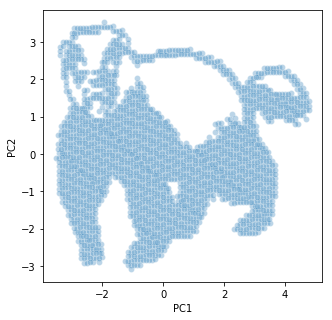

In [259]:
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="PC1", y="PC2",
    palette=sns.color_palette("hls", 10),
    data=pc_df,
    legend="full",
    alpha=0.3
)

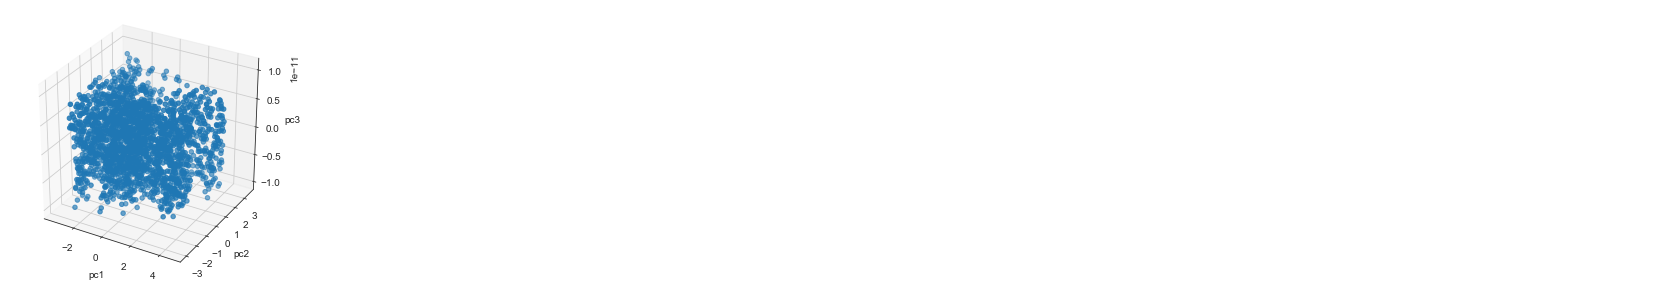

In [207]:
ax = plt.figure(figsize=(5,5)).gca(projection='3d')
ax.scatter3D(
    xs=X_new[:,0],
    ys=X_new[:,1],
    zs=X_new[:,2],
)
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
plt.show()

**Question:** What do you notice?

**Response**: With the first two principles, the figure of the bear is visible. This clearly explains how the first two principles show the entire data. With higher components, the figure does not change visibly.

## Topology Optimization Dataset (Required for ENME 743 , Optional for 440)
For this problem, you will be using unsupervised linear models to help understand and interpret the results of a mechanical optimization problem. Specifically, to understand the solution space generated by a topology optimization code; that is, the results of finding the optimal geometries for minimizing the compliance of various bridge structures with different loading conditions. The input consists of 1,000 images of optimized material distribution for a beam as described in *Figure 1*. A symmetrical boundary condition, left side, is used to reduce the analysis to only half. Also, a rolling support is included at the lower right corner. Notice that the rolling support is the only support in the vertical direction. 

&nbsp;

![](beam_description.jpg)
<center>Figure 1: Left: Nx-by-Ny design domain for topology optimization problem. Right: Example loading configuration and resulting optimal topology. Two external forces, Fi, were applied to the beam at random nodes represented by (xi, yi) coordinates.<sup>1</sup></center>

&nbsp;

Use Principal Component Analysis (either an existing library, or through your own implementation by taking the SVD of the Covariance Matrix) for the follow tasks.

<sup>1. This problems data is based on the problem setup seen in the following paper: Ulu, E., Zhang, R., & Kara, L. B. (2016). A data-driven investigation and estimation of optimal topologies under variable loading configurations. *Computer Methods in Biomechanics and Biomedical Engineering: Imaging & Visualization*, 4(2), 61-72.</sup>

The images are 217 pixels high and 434 pixels wide
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


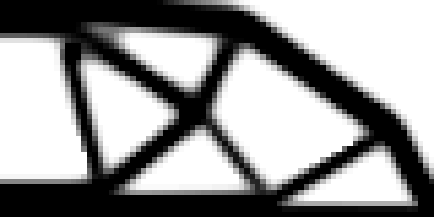

In [3]:
# To help you get started, the below code will load the images from the associated image folder:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

im_dir = './topo_opt_runs/'

images = []
for filename in os.listdir(im_dir):
    try:
        img = Image.open(im_dir+filename).convert('L')
        images.append(np.asarray(img))
    except:
        pass

height,width = images[0].shape
print('The images are {:d} pixels high and {:d} pixels wide'.format(height,width))

# Print matrix corresponding to the image:
print(images[-1])
# And show example image, so you can see how matrix correponds:
img

(217, 434)

217

### Task 1: Scree/Singular Value Plot
As with the toy example, assume that the 94,178-dimensional space is excessive. You would like to reduce the dimension of the image space. First compute its intrinsic dimensionality. Plot the relative value of the information content of each of the principal components and compare them.

In [183]:
from sklearn.preprocessing import normalize
a =images
b = np.reshape(a,(1000,217*434))
np.shape(b)
b_norm = normalize(b)

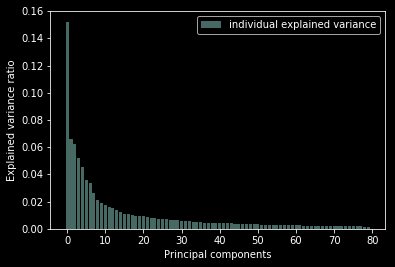

In [192]:
pca = PCA(n_components=80, svd_solver='auto')
pca.fit(b_norm)
explained_variance = pca.explained_variance_ratio_
explained_variance
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(80), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

In [193]:
np.sum(explained_variance)

0.870293918101505

In [209]:
pca = PCA(.99)
#pca = PCA(n_components=60, svd_solver='auto')
pca.fit(b_norm)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.52236906e-01, 6.59468912e-02, 6.27001800e-02, 5.19782705e-02,
       4.54913697e-02, 3.59897866e-02, 3.33098172e-02, 2.60980506e-02,
       2.12081477e-02, 1.86316044e-02, 1.78598187e-02, 1.61897857e-02,
       1.49322769e-02, 1.37220666e-02, 1.21012827e-02, 1.12201666e-02,
       1.05726797e-02, 1.04460857e-02, 9.74838709e-03, 9.32645862e-03,
       9.16229668e-03, 8.61111562e-03, 8.24081661e-03, 7.61720277e-03,
       7.19989083e-03, 7.02537326e-03, 6.98157440e-03, 6.58503529e-03,
       6.51841724e-03, 6.26728063e-03, 5.74736865e-03, 5.58834954e-03,
       5.53412946e-03, 5.30874235e-03, 4.98820013e-03, 4.69672565e-03,
       4.60762505e-03, 4.44107742e-03, 4.37436667e-03, 4.30800832e-03,
       4.16986648e-03, 4.07752273e-03, 3.92895916e-03, 3.92787518e-03,
       3.82984599e-03, 3.60190229e-03, 3.49678141e-03, 3.41212507e-03,
       3.34478205e-03, 3.19684625e-03, 3.17271751e-03, 3.12165887e-03,
       3.07296476e-03, 3.00224657e-03, 2.93241980e-03, 2.87790882e-03,
      

In [210]:
np.sum(explained_variance)

0.9900094746034322

In [211]:
expvar = np.shape(explained_variance)

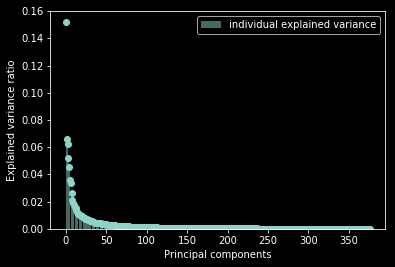

In [212]:
import matplotlib.pyplot as plt
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(expvar[0]), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    #plt.xlim(0,60)
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.plot(explained_variance, "o", linewidth=2)
    plt.axis('tight')

**Question:** Approximately how many components dominate the space? What does this tell us about the intrinsic dimensionality of the space?

**Response**: From the analysis, we can see that with 80 components, 87% of the data can be explained. Although with 99% pca, we found that 377 components are needed to explain 99% of the data, 80 components are sufficient to capture teh important parts of the images. The explained variance for the first component is about 15%. We can consider a criteria for defining the number of components that dominate space. For example, I consider the variances greater than 4% as the criteria and with that we can see 6 components can explain most part of the data. To be more accurate, looking at the graph, we can see after around 25 PCs, the explained variance is very close to zero. So, we can assume that the intrinsic dimensionality of the space is 25.


### Task 2: Principal Components
Now plot the first 5 principal components.

Hint: You will have to generate a One Hot Enconding vector for each principal component. Later, use the function *inverse_transform()* to obtain the image as a vector (length 94,178), which you will have to reshape into the original image dimensions to plot (217 pixels high and 434 pixels wide).

**Question:** Looking at each of these top 5 principal components, what does each component represent (physically, in terms of what it means for where material in the bridge is placed)? What is the key difference between the 1st and 2nd principal component? 

**Response**: The 1st PC (PC0 in the figure) shows the main structure for optimal topologies, it shows the boundaries and the outer structural frame, for the 2nd pc (PC1 in the figure), some of the bridge structure in the middle of image has been reconstructed. But in PC3 and PC4, we can see the boundaries are not as visible and te focus is on a different part. For example PC3 captures the middle beam.

In [95]:
lower_dimension_data = pca.fit_transform(b_norm)

approximation = pca.inverse_transform(lower_dimension_data)
approximation.shape

(1000, 94178)

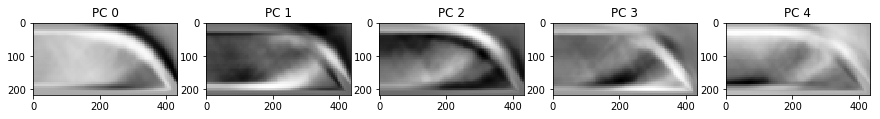

In [238]:
fig , axes = plt.subplots(1,5,figsize=(15,15))
for i, ax in enumerate(axes.flat):
    #ax.plot(pca.components_[i,:].reshape(217,434))
    ax.imshow(pca.components_[i,:].reshape(217,434),cmap='Greys_r')
    ax.set_title('PC %d' %i)

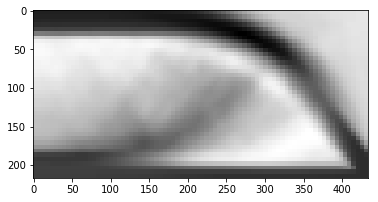

In [125]:
pca = PCA(n_components=5, svd_solver='auto')
pca.fit(b_norm)
c = pca.fit_transform(b_norm)
apprx = pca.inverse_transform(c)
plt.imshow(apprx[0,:].reshape(217,434),cmap='gray')

(1000, 94178)

### Task 3: Image Reconstruction
After the dimensionality reduction has been performed (using the K you find in Task 2), reconstruct the first 5 images from the dataset and plot them against the original images. That is, first, (A) plot the original image itself and then (B) project the original image onto its principal components (i.e., translate from image space to PCA space), and (C) un-project/inverse-transform the PCA coordinates back into image space and plot the resulting image.

Hint: The unprojected image should bear some resemblance to the original image but not be 100% the same.

In [214]:
pca = PCA(n_components=25, svd_solver='auto')
pca.fit(b_norm)
c = pca.fit_transform(b_norm)
apprx = pca.inverse_transform(c)
np.shape(apprx)

(1000, 94178)

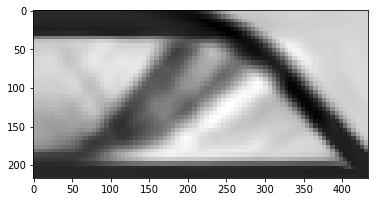

In [227]:
plt.imshow(apprx[1,:].reshape(217,434),cmap='gray')

Text(0.5, 1.0, 'reconstructed')

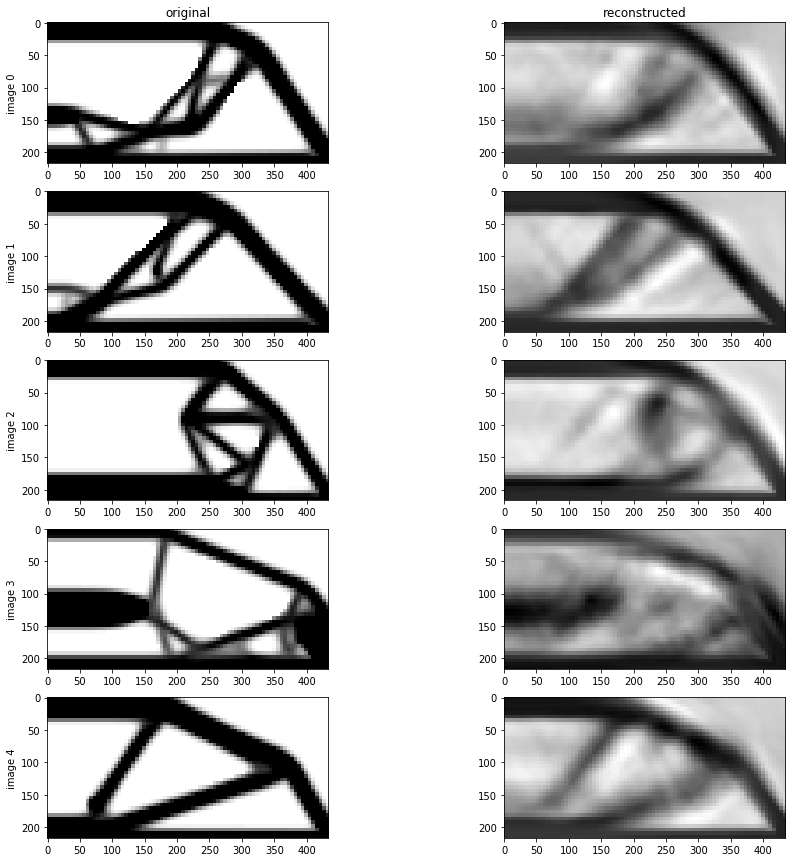

In [265]:
fig , axes = plt.subplots(5,2,figsize=(15,15))
for i in range(5):
    axes[i,1].imshow(apprx[i,:].reshape(217,434),cmap='gray')
    axes[i,0].imshow(images[i],cmap='gray')
    axes[i,0].set_ylabel('image %d' %i)
axes[0,0].set_title('original')
axes[0,1].set_title('reconstructed')

**Question:** By visual examination, how do the original images compare to those that are reconstructed? Which (if any) parts of the bridge structures in the original images appear harder to reconstruct accurate? Which parts are easier to reconstruct? Why is this?

**Response**: The reconstructed images cannot accurately capture the complex parts of the bridge structures. For example in figure 1, it can be seen that the curves in the structures are not accurately reconstructed. Or in image 3, the part closer to the support is not captured. However, it seems reconstructing the boundaries are easier.

### Task 4: Projection Plot
Now use PCA to project the images on the 2-dimensional space (the first 2 principal components) and plot a 50 random images. (If you try to plot all the data it will be unwieldy, so just randomly subsample 50 of the datapoints). 

Hint: Your plot should look similar to something like Figure 2:

<img src="plot.png" alt="Drawing" style="width: 400px;"/>
<center>Figure 2: Images projected on the reduced 2-dimensional space.</center>

&nbsp;


In [129]:
# Your Code here
pca = PCA(n_components=2, svd_solver='auto')
pca.fit(b_norm)
c = pca.fit_transform(b_norm)

In [156]:
randimg = np.random.randint(0,1000,50)

In [157]:
p = c[randimg,:]

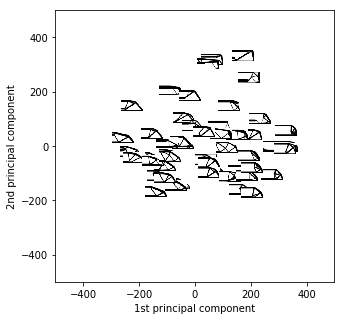

In [246]:
fig,ax = plt.subplots(1, 1,figsize=(5,5))
for i in range(50):
    
    # This creates a box that loads an image into it
    imagebox = OffsetImage(images[randimg[i]], zoom=.05,cmap=plt.get_cmap('Greys_r')) 
    # AnnotationBbox lets you place the OffsetImage at a given x,y point on the axis
    x=1000*p[i,0]; y=1000*p[i,1];
    ab = AnnotationBbox(imagebox, [x,y], frameon=False,
    xybox=(3., -3.),
    xycoords='data',
    boxcoords="offset points")                                  
    # Now add the annotation to the axis
    ax.add_artist(ab)
    ax.set_ylim([-500,500])
    ax.set_xlim([-500,500])
    ax.set_ylabel('2nd principal component')
    ax.set_xlabel('1st principal component')

**Question:** One purpose of PCA is to help project similar data near one another, and disimilar points further away. Is this true in this case? Are close images similar or dissimilar in any discernable way? (If so, describe how so.)

**Response**:

## Appendix: Helpful Plotting Functions
The below code demonstrates how to plot images on a 2D plane given coordinates.

(-1, 1)

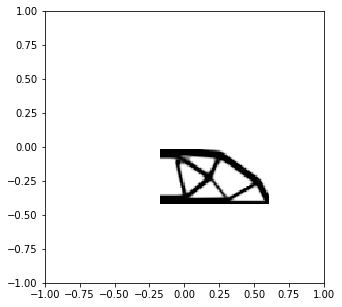

In [126]:
# To help with some of the image plotting on a 2D plane, you can use Offset Image
# as shown below, or you can use your own method if you prefer as long as it is clear
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
# Create Figure and Axis Object
fig,ax = plt.subplots(1, 1,figsize=(5,5))
# This creates a box that loads an image into it
imagebox = OffsetImage(img, zoom=.25,cmap=plt.get_cmap('Greys_r')) 
# AnnotationBbox lets you place the OffsetImage at a given x,y point on the axis
x=0; y=0;
ab = AnnotationBbox(imagebox, [x,y], frameon=False,
    xybox=(30., -30.),
    xycoords='data',
    boxcoords="offset points")                                  
# Now add the annotation to the axis
ax.add_artist(ab)
ax.set_ylim([-1,1])
ax.set_xlim([-1,1])

In [141]:
np.shape(images[0])

(217, 434)